In [ ]:
import pandas as pd
import numpy as np
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import math
import datetime
import time

In [ ]:
pip install keras

In [ ]:
# set default dimentions for the images
img_width, img_height = 224, 224

#create bottleneck file is conver all the img pixels into numpy array
top_model_weights_path = 'bottleneck_fc_model.h5'


In [ ]:
# !unzip 'data.zip' -d 'data/'

**Importing flowers folder (dataset) and partitioning it into train, test and validation data set**

In [ ]:
# import os
# import shutil
# import random

# # Define the paths
# dataset_directory = 'data'  # Your unzipped dataset directory
# train_data_dir = 'data/train'
# validation_data_dir = 'data/validation'
# test_data_dir = 'data/test'

# # Define the split ratios
# train_ratio = 0.6
# validation_ratio = 0.2
# test_ratio = 0.2

# # Create the train, validation, and test directories
# os.makedirs(train_data_dir, exist_ok=True)
# os.makedirs(validation_data_dir, exist_ok=True)
# os.makedirs(test_data_dir, exist_ok=True)

# # Loop through the subdirectories (flower categories)
# for category in os.listdir(dataset_directory):
#     category_path = os.path.join(dataset_directory, category)
#     image_files = os.listdir(category_path)
#     random.shuffle(image_files)

#     # Calculate the split points
#     total_images = len(image_files)
#     train_split = int(train_ratio * total_images)
#     validation_split = train_split + int(validation_ratio * total_images)

#     # Split the images into train, validation, and test sets
#     train_images = image_files[:train_split]
#     validation_images = image_files[train_split:validation_split]
#     test_images = image_files[validation_split:]

#     # Move images to their respective directories
#     for image in train_images:
#         src = os.path.join(category_path, image)
#         dest = os.path.join(train_data_dir, category, image)
#         os.makedirs(os.path.dirname(dest), exist_ok=True)
#         shutil.copy(src, dest)

#     for image in validation_images:
#         src = os.path.join(category_path, image)
#         dest = os.path.join(validation_data_dir, category, image)
#         os.makedirs(os.path.dirname(dest), exist_ok=True)
#         shutil.copy(src, dest)

#     for image in test_images:
#         src = os.path.join(category_path, image)
#         dest = os.path.join(test_data_dir, category, image)
#         os.makedirs(os.path.dirname(dest), exist_ok=True)
#         shutil.copy(src, dest)


In [ ]:
#loading datasets
train_data_dir = '/content/drive/MyDrive/Colab Notebooks/data/train'
validation_data_dir = '/content/drive/MyDrive/Colab Notebooks/data/validation'
test_data_dir = '/content/drive/MyDrive/Colab Notebooks/data/test'

In [ ]:
# number of epoch to train top model
epoch = 10 #this has been changed after multiple model run


#batch size used by flow_from_directory and predict_generator
batch_size = 5

In [ ]:

#Loading vgc16 model
vgg16 = applications.VGG16(include_top=False, weights='imagenet')

# To sacle the image from 0-255 pixels to 0-1 range.
datagen = ImageDataGenerator(rescale=1. / 255)
#needed to create the bottleneck .npy files

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
import datetime

In [ ]:
#__this can take an hour and half to run so only run it once.
#once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()

generator = datagen.flow_from_directory(
     train_data_dir,
     target_size=(img_width, img_height),
     batch_size=batch_size,
     class_mode=None,
     shuffle=False)

nb_train_samples = len(generator.filenames)
num_classes = len(generator.class_indices)

predict_size_train = int(math.ceil(nb_train_samples / batch_size))

bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train)

np.save('bottleneck_features_train.npy', bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 2588 images belonging to 5 classes.


<ipython-input-12-3f2ec1d70936>:18: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train)


Time:  0:27:02.678022


In [ ]:
print('-'*117)

---------------------------------------------------------------------------------------------------------------------


In [ ]:
#__this can take half an hour to run so only run it once. once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
generator = datagen.flow_from_directory(
     validation_data_dir,
     target_size=(img_width, img_height),
     batch_size=batch_size,
     class_mode=None,
     shuffle=False)

nb_validation_samples = len(generator.filenames)

predict_size_validation = int(math.ceil(nb_validation_samples / batch_size))

bottleneck_features_validation = vgg16.predict_generator(
     generator, predict_size_validation)

np.save('bottleneck_features_validation.npy', bottleneck_features_validation)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 860 images belonging to 5 classes.


<ipython-input-14-1c8deb998369>:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  bottleneck_features_validation = vgg16.predict_generator(


Time:  0:09:24.493598


In [ ]:
print('-'*117)

---------------------------------------------------------------------------------------------------------------------


In [ ]:
#__this can take half an hour to run so only run it once. once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
generator = datagen.flow_from_directory(
     test_data_dir,
     target_size=(img_width, img_height),
     batch_size=batch_size,
     class_mode=None,
     shuffle=False)

nb_test_samples = len(generator.filenames)

predict_size_test = int(math.ceil(nb_test_samples / batch_size))

bottleneck_features_test = vgg16.predict_generator(
     generator, predict_size_test)

np.save('bottleneck_features_test.npy', bottleneck_features_test)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 869 images belonging to 5 classes.


<ipython-input-16-08e4701c76b7>:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  bottleneck_features_test = vgg16.predict_generator(


Time:  0:09:25.098031


# LOAD TRAINING, VALIDATION and TESTING data

In [ ]:
#training data
generator_top = datagen.flow_from_directory(
         train_data_dir,
         target_size=(img_width, img_height),
         batch_size=batch_size,
         class_mode='categorical',
         shuffle=False)

nb_train_samples = len(generator_top.filenames)
num_classes = len(generator_top.class_indices)

# load the bottleneck features saved earlier
train_data = np.load('bottleneck_features_train.npy')

# get the class lebels for the training data, in the original order
train_labels = generator_top.classes

# convert the training labels to categorical vectors
train_labels = to_categorical(train_labels, num_classes=num_classes)

Found 2588 images belonging to 5 classes.


In [ ]:
#validation data
generator_top = datagen.flow_from_directory(
         validation_data_dir,
         target_size=(img_width, img_height),
         batch_size=batch_size,
         class_mode=None,
         shuffle=False)

nb_validation_samples = len(generator_top.filenames)

validation_data = np.load('bottleneck_features_validation.npy')


validation_labels = generator_top.classes
validation_labels = to_categorical(validation_labels, num_classes=num_classes)

Found 860 images belonging to 5 classes.


In [ ]:
#testing data
generator_top = datagen.flow_from_directory(
         test_data_dir,
         target_size=(img_width, img_height),
         batch_size=batch_size,
         class_mode=None,
         shuffle=False)

nb_test_samples = len(generator_top.filenames)

test_data = np.load('bottleneck_features_test.npy')


test_labels = generator_top.classes
test_labels = to_categorical(test_labels, num_classes=num_classes)

Found 869 images belonging to 5 classes.


# Training of model

In [ ]:
start = datetime.datetime.now()
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(100, activation=keras.layers.LeakyReLU(alpha=0.3)))
model.add(Dropout(0.5))
model.add(Dense(50, activation=keras.layers.LeakyReLU(alpha=0.3)))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit(train_data, train_labels,
      epochs=10,
      batch_size=batch_size,
      validation_data=(validation_data, validation_labels))

model.save_weights(top_model_weights_path)

(eval_loss, eval_accuracy) = model.evaluate(
 validation_data, validation_labels, batch_size=batch_size, verbose=1)

print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
print("[INFO] Loss: {}".format(eval_loss))
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Epoch 1/10
518/518 [==============================] - 17s 31ms/step - loss: 3.4475 - acc: 0.4764 - val_loss: 1.4662 - val_acc: 0.6570
Epoch 2/10
518/518 [==============================] - 14s 28ms/step - loss: 2.0808 - acc: 0.6298 - val_loss: 1.3809 - val_acc: 0.7140
Epoch 3/10
518/518 [==============================] - 16s 31ms/step - loss: 1.5078 - acc: 0.6978 - val_loss: 1.1153 - val_acc: 0.7360
Epoch 4/10
518/518 [==============================] - 14s 28ms/step - loss: 1.1688 - acc: 0.7276 - val_loss: 0.7353 - val_acc: 0.7721
Epoch 5/10
518/518 [==============================] - 15s 29ms/step - loss: 0.8619 - acc: 0.7713 - val_loss: 0.6532 - val_acc: 0.7895
Epoch 6/10
518/518 [==============================] - 15s 28ms/step - loss: 0.6545 - acc: 0.8168 - val_loss: 0.8197 - val_acc: 0.7988
Epoch 7/10
518/518 [==============================] - 15s 28ms/step - loss: 0.5959 - acc: 0.8377 - val_loss: 0.7590 - val_acc: 0.7709
Epoch 8/10
518/518 [==============================] - 14s 28ms

In [ ]:
#Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 100)               2508900   
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_5 (Dense)             (None, 5)                 255       
                                                                 
Total params: 2514205 (9.59 MB)
Trainable params: 2514

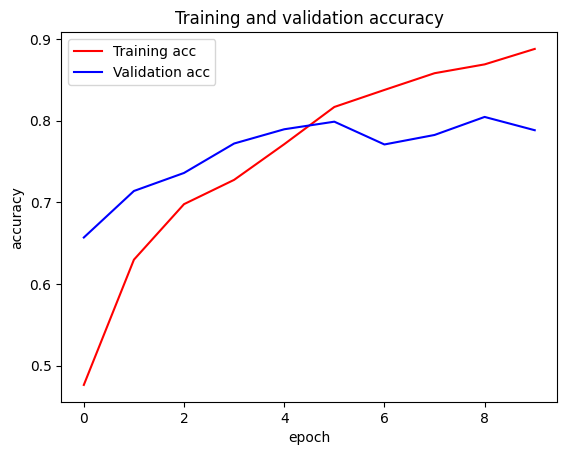

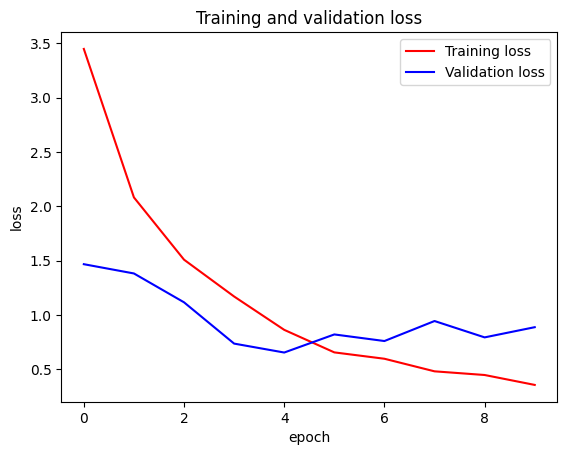

In [ ]:
#Graphing our training and validation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_data, test_labels)

28/28 [==============================] - 0s 10ms/step - loss: 0.9478 - acc: 0.7756


[0.9477736353874207, 0.7756041288375854]

In [ ]:
print('test data', test_data)
preds = np.round(model.predict(test_data),0)
#to fit them into classification metrics and confusion metrics, some additional modificaitions are required
print('rounded test_labels', preds)

test data [[[[1.11884966e-01 0.00000000e+00 7.10494936e-01 ... 0.00000000e+00
    6.98234618e-01 0.00000000e+00]
   [5.41343987e-02 0.00000000e+00 9.36969817e-01 ... 8.58805329e-02
    5.79485178e-01 0.00000000e+00]
   [1.38215363e-01 0.00000000e+00 2.35185623e-01 ... 0.00000000e+00
    4.97702122e-01 0.00000000e+00]
   ...
   [2.21612290e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    6.36986732e-01 0.00000000e+00]
   [2.02032059e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    7.73977757e-01 0.00000000e+00]
   [8.05085674e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    7.73921251e-01 0.00000000e+00]]

  [[0.00000000e+00 0.00000000e+00 7.53638506e-01 ... 2.28184372e-01
    6.76078379e-01 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 7.37383604e-01 ... 1.58937052e-01
    4.41396534e-01 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
    3.49516332e-01 0.00000000e+00]
   ...
   [0.00000000e+00 0.00000000e+00 9.78758812e-0

In [ ]:
flowers = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
classification_metrics = metrics.classification_report(test_labels, preds, target_names=flowers )
print(classification_metrics)

              precision    recall  f1-score   support

       daisy       0.84      0.74      0.79       154
   dandelion       0.78      0.88      0.83       211
        rose       0.69      0.85      0.76       158
   sunflower       0.94      0.56      0.70       148
       tulip       0.81      0.76      0.78       198

   micro avg       0.79      0.77      0.78       869
   macro avg       0.81      0.76      0.77       869
weighted avg       0.81      0.77      0.78       869
 samples avg       0.77      0.77      0.77       869



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# confution matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Since our data is in dummy format we put the numpy array into a dataframe and call idxmax axis=1 to return the column
# label of the maximum value thus creating a categorical variable
#Basically, flipping a dummy variable back to it's categorical variable
categorical_test_labels = pd.DataFrame(test_labels).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)

In [ ]:
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

In [ ]:
#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
             normalize=False,
             title='Confusion matrix',
             cmap=plt.cm.Blues):
    #Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


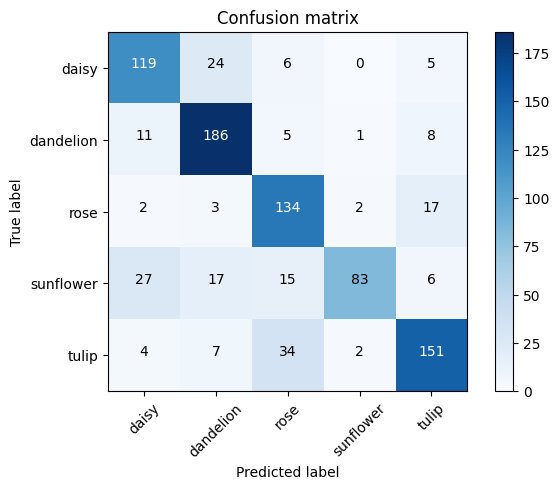

In [ ]:
plot_confusion_matrix(confusion_matrix, ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'])

Normalized confusion matrix


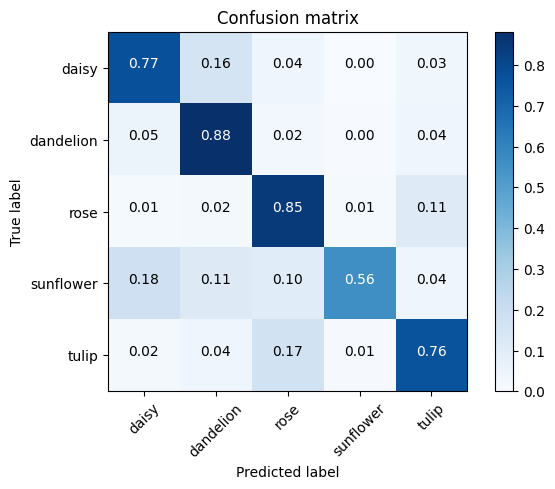

In [ ]:
#Those numbers are all over the place. Now turning normalize= True
plot_confusion_matrix(confusion_matrix,
                      ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip'],
                     normalize=True)

# Testing images on model

In [ ]:
def read_image(file_path):
    print("[INFO] loading and preprocessing image...")
    image = load_img(file_path, target_size=(224, 224))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image /= 255.
    return image

In [ ]:
def test_single_image(path):
    flowers = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
    images = read_image(path)
    # time.sleep(.5)
    bt_prediction = vgg16.predict(images)
    preds = model.predict(bt_prediction)
    for idx, flower, x in zip(range(0,6), flowers , preds[0]):
        print("ID: {}, Label: {} {}%".format(idx, flower, round(x*100,2) ))

    return load_img(path)

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/data/test/daisy/10555749515_13a12a026e.jpg'

[INFO] loading and preprocessing image...
1/1 [==============================] - 0s 33ms/step
ID: 0, Label: daisy 89.25%
ID: 1, Label: dandelion 10.71%
ID: 2, Label: rose 0.0%
ID: 3, Label: sunflower 0.04%
ID: 4, Label: tulip 0.0%


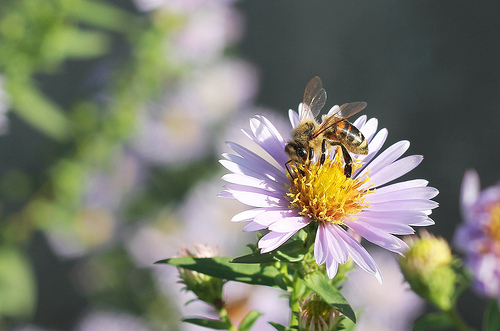

In [ ]:
test_single_image(path)